# APLICACIONES DE CIENCIAS DE LA COMPUTACIÓN (INF265)
## (Segundo Semestre 2023)

# Laboratorio 7: Preprocesamiento de Datos

Indicaciones generales:

- Duración: **120 minutos (2 horas)**.
- **Las respuestas deben contar con un buen fundamento teórico**, se realizarán descuentos en el puntaje a respuestas que no contesten a lo solicitado.
- Cualquier indicio de plagio resultará en la anulación de la prueba.
- Debe presentar sus respuestas en base a los resultados de ejecución en los casos que se solicite.
- **No se calificarán aquellas respuestas que no presenten un resultado de ejecución o que no concuerden con este.**
- Subir el cuadernillo con el nombre **Lab7_código.ipynb**, donde código es su código PUCP de 8 dígitos.  
- Se tomará en cuenta en la calificación el uso de comentarios relevantes.

Objetivos:
- Realizar un análisis exploratorio de datos básico.
- Preprocesar un conjunto de datos.

## Entendimiento del problema
El hundimiento del Titanic es uno de los naufragios más infames de la historia.

El 15 de abril de 1912, durante su viaje inaugural, el RMS Titanic, ampliamente considerado “insumergible”, se hundió después de chocar con un iceberg. Desafortunadamente, no había suficientes botes salvavidas para todos a bordo, lo que provocó la muerte de 1.502 de los 2.224 pasajeros y tripulantes.

Si bien hubo algún elemento de suerte involucrado en la supervivencia, parece que algunos grupos de personas tenían más probabilidades de sobrevivir que otros.

En este desafío, le pedimos que construya un modelo predictivo que responda a la pregunta: "¿qué tipo de personas tenían más probabilidades de sobrevivir?" utilizando datos de los pasajeros (es decir, nombre, edad, sexo, clase socioeconómica, etc.). Antes de ello , se debe de hacer un pre-procesamiento de data


## Detalle de los datos
En particular, se tiene a disposición los siguientes datos:


* Survival:	Inidica si la persona sobrevivio ( 0 = No, 1 = Si )
* pclass:	Indica que tipo de ticket compro el pasajero ( Clase del Ticket 	1 = 1ra, 2 = 2da, 3 = 3ra )
* Sex : male o female
* Age:	La edad en años
* sibsp:	# de hermanos / esposos abordo del Titanic
* parch:	# de padres / hijos abordo the Titanic
* ticket:	Numero del Ticket
* fare:	Tarifa del pasajero
* cabin:	Numero de Cabina
* embarked:	Puerto de embarque	C = Cherbourg, Q = Queenstown, S = Southampton

La introducción la realizaremos con el titanic dataset, el cual está disponible en:
<br/>
<br/>
https://www.kaggle.com/c/titanic/data
<br/>
<br/>
Específicamente haremos uso del "train.csv" el cual se generará al ejecutar la siguiente celda:

## Cargando datos

In [1]:
import pandas as pd

# Importamos la información
df = pd.read_csv('train.csv', index_col = 0, sep = ',')
print('Se leyo un dataset de dimensiones {}'.format(df.shape))
df.head()

Se leyo un dataset de dimensiones (891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**P1.(1 pt)**  Muestre el tipo de dato de las columnas (variables):

In [2]:
#Escriba su código aqui
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

**P2.(1 pt)** Muestre la cantidad de valores unicos por cada variable y su pocentaje con respecto al numero total de filas del dataset.

In [16]:
#Escriba su código aqui
df.nunique()/df.shape[0]





Survived    0.002245
Pclass      0.003367
Name        1.000000
Sex         0.002245
Age         0.101010
SibSp       0.007856
Parch       0.007856
Ticket      0.764310
Fare        0.278339
Cabin       0.164983
Embarked    0.003367
dtype: float64

**P3.(1 pt)** Muestre la cantidad de valores nulos por cada variable y su pocentaje con respecto al numero total de filas del dataset

In [58]:
#Escriba su código aqui


df.isnull().sum() /df.shape[0]


Survived    0.000000
Pclass      0.000000
Sex         0.002548
Age         0.135032
SibSp       0.000000
Parch       0.000000
Fare        0.000000
Cabin       0.741401
Embarked    0.002548
dtype: float64

**P4.(2 pt)** Con relación a los nulos de la variable "Embarked", decida cómo procesarlos (dropear o imputar). Justifique su elección.

In [11]:
#Escriba su código aqui
df.isnull().sum()
df.isnull().sum() /df.shape[0]
#RPTA:
#Vemos que en el caso de Embarked se IMPUTA dicha columna ya que contiene poca cantidad de nulos, siendo 2 nulos en 891 filas y en porcentaje con el nuemero de
#filas es tan solo el 0.224467 %, siendo este valor muy pequeño y seria un desperdicio dropearlo



Survived      0
Pclass        0
Name          0
Sex           2
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

**P5.(3 pt)** Elimine del dataframe las variables que tengan el porcentaje de valores únicos con respecto al numero de filas > 0.7. Explique por qué seria una buena practica eliminar las columnas cuyo porcentaje de registros únicos sea cercano a 100% del numero de filas

In [29]:
#Determinamos aquellas columnas (variables) que tengan un porcentaje de filas (registros) únicas por cada columna (variable) mayor al valor de 0.7
threshold = 0.7


##COMPLETE EL CODIGO##
df.nunique()/df.shape[0]
#ingrese el porcentaje de registros unicos por cada columna
unique_percentages =df.nunique()/df.shape[0]

criteria = unique_percentages > 0.7

#no modifique este codigo
columnas_filtradas = unique_percentages[criteria].keys()

columnas_filtradas

##COMPLETE. Borrado de las columnas_filtradas
df.drop(columnas_filtradas,axis=1, inplace =True)

**Explicación**

Sería buena practica ya que de esta forma podemos "generalizar" las variables, eliminando las variables que tengan porcentaje de valores unicos mas altos lo que logramos es poder tener un conteo mas general y no uno tan especifico como antes de eliminar

<font color = 'blue'>**Eliminacion de duplicados** </font>

Después de eliminar las variables cuyo porcentaje de valores únicos sea mayor al 70% del total de filas procedemos a eliminar las filas (registros) duplicadas.
<br/>
<br/>
Si ejecutáramos esto antes del paso anterior no encontrariamos ningun duplicado debido que las filas se diferenciarían entre sí justamente por las variables cuyo porcentaje de valores únicos es cercano al 100% del numero de filas. Por ejemplo, si tuvieramos el siguiente dataset y tratáramos de eliminar los duplicados no pasaría nada:

>A | B | C
>--- | --- | ---
>1 | h | i
>2 | j | k
>3 | h | i

Pero si elimináramos la columna (variable) A y eliminarámos duplicados obtendríamos el siguiente dataset:

>B | C
>--- | ---
>h | i
>j | k

El procedimiento de eliminar duplicados también considera los nulos para determinar si una fila (registro) es distinta o no de otra:

In [30]:
#Al aplicar "drop_duplicates" obtenemos un nuevo "DataFrame", pero con el parámetro inplace igual a "True" podemos realizar dicha operación de
#eliminación y sobre-escribir el "DataFrame" del cual estamos eliminando con el nuevo "DataFrame" obtenido
df.drop_duplicates(keep="first", inplace=True)

#Revisamos cuantas filas (registros) y columnas (variables) tiene el dataset después de eliminar los duplicados
df.shape

(785, 9)

In [31]:
#Revisamos la cantidad de filas (registros) vacías por cada columna (variable) después de eliminar los duplicados para verificar que si se llegaron a eliminar nulos
df.isna().sum()

Survived      0
Pclass        0
Sex           2
Age         106
SibSp         0
Parch         0
Fare          0
Cabin       582
Embarked      2
dtype: int64

Vemos que aun sigue existiendo registros con valores nulos para algunas columnas

Determinamos que variables son del tipo númerico y cuales son categóricas para poder aplicar el procedimiento adecuado más adelante:



In [32]:
col_numericas = df.select_dtypes('number').columns
col_categoricas = df.select_dtypes(['category','object']).columns  # columnas de tipo category y object son categóricas

df_numerico = df[col_numericas].copy(deep=True)
df_categorico = df[col_categoricas].copy(deep=True)

In [35]:
df_numerico.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,0,3,22.0,1,0,7.2500
2,1,1,38.0,1,0,71.2833
3,1,3,26.0,0,0,7.9250
4,1,1,35.0,1,0,53.1000
5,0,3,35.0,0,0,8.0500


In [34]:
df_categorico.head()

,Sex,Cabin,Embarked
PassengerId,,,
1,male,NaN,S
2,female,C85,C
3,female,NaN,S
4,female,C123,S
5,male,NaN,S


#Variables numericas

**P6.(pt 3)** Muestre descriptivos estadísticos y boxplots de las variables numericas. Explique si observa valores inconsistentes (valores negativos, edades arriba de 100, valores muy atipicos (mayores a la media + 5 veces la desviacion estandard), etc. Coloque NaN  en dichos valores

In [42]:
#Escriba su código aqui para mostrar los estadisticos y boxplots

#ESTADISTICOS
df_numerico.describe().T



,count,mean,std,min,25%,50%,75%,max
Survived,785.0,0.411465,0.492413,0.0,0.00,0.0,1.0000,1.0000
Pclass,785.0,2.244586,0.854937,1.0,1.00,3.0,3.0000,3.0000
Age,679.0,30.078675,17.073609,-28.0,20.00,28.0,39.0000,247.0000
SibSp,785.0,0.522293,0.985779,0.0,0.00,0.0,1.0000,8.0000
Parch,785.0,0.415287,0.836520,0.0,0.00,0.0,1.0000,6.0000
Fare,785.0,34.677579,52.135661,0.0,8.05,15.9,34.0208,512.3292


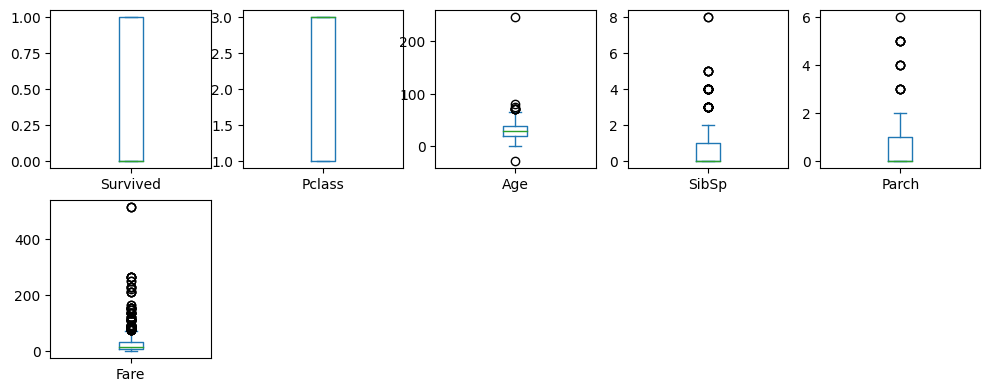

In [41]:
#BOXPLOTS

import matplotlib.pyplot as plt
df_numerico.plot(kind='box', subplots=True, layout=(3,5), sharex=True, sharey=False,  figsize=[12,7])
plt.show()

**Indique sus Observaciones:**

Puedo notar que para el caso de age, existe un valor donde la edad es negativa, y tambien otro donde la edad es mayor a 100. En el casode otras variables como SibSp, Parch existe 4 valores atipicos, mientras que para Fare son muchos los valores atipicos

In [65]:
#Escriba su código aqui para colocar NaN en los valores inconsistentes

df_numerico.loc[df.Age <0, 'Age'] = 0
df_numerico.loc[df.Age> df_numerico.mean().Age + 5*df_numerico.std().Age, 'Age'] = 0
df_numerico.loc[df.SibSp> df_numerico.mean().SibSp + 5*df_numerico.std().SibSp, 'SibSp'] = 0
df_numerico.loc[df.Parch> df_numerico.mean().Parch + 5*df_numerico.std().Parch, 'Parch'] = 0
df_numerico.loc[df.Fare> df_numerico.mean().Fare + 5*df_numerico.std().Fare, 'Fare'] = 0

Optamos por reemplazar los nulos con algún valor para la columna (variable) "Age" debido que tiene un porcentaje de nulos cercano al 15% en todo el dataset.
Se decide usar la mediana para reemplazar los nulos.

**P7.(3 pt)** Con relación a los nulos de la variables numericas, decida cómo va procesarlos (imputar, dropear filas, o dropear columnas). Justifique su elección indicando el porcentaje de valores nulos de la variables. Si decide imputar, puede hacerlo con la media o la mediana, pero justifique la ventaja de su elección.


In [ ]:
#Escriba su código aqui
#Para Fare se puede dropear ya q

**RESPUESTA**:
Para Fare se puede dropear ya que tiene una gran cantidad de valores atipicos, mientras que para lo demas se puede imputar o solo dropear algunas filas

#Variables Categoricas

**P8.(3 pt)** Presente el porcentaje de nulos de las columnas categoricas.  Con base a ello decida por cada variable: imputar, dropear filas, o dropear la variable (si el porcentaje de nulos es mayor a 50%). Justifique sus elecciones

In [59]:
#Escriba su código aqui
df_categorico.isnull().sum() /df_categorico.shape[0]

Sex         0.002548
Cabin       0.741401
Embarked    0.002548
dtype: float64

In [66]:
#dropeamos la columna Cabin ya que contiene mas de 50% nulo
df = df.drop(columns = ['Cabin'])

A

In [67]:
# No eliminar esta celda
df.isna().sum()

Survived      0
Pclass        0
Sex           2
Age         106
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [68]:
# No eliminar esta celda
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S
6,0,3,male,NaN,0,0,8.4583,Q
7,0,1,male,54.0,0,0,51.8625,S
8,0,3,male,2.0,3,1,21.0750,S
9,1,3,female,27.0,0,2,11.1333,S


In [69]:
# No eliminar esta celda
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

**P9.(2 pt)**  Muestre el plot de correlaciones entre todas las variables y comente sus observaciones

<ipython-input-70-b98ede563db5>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr().apply(lambda x: round(x,2))


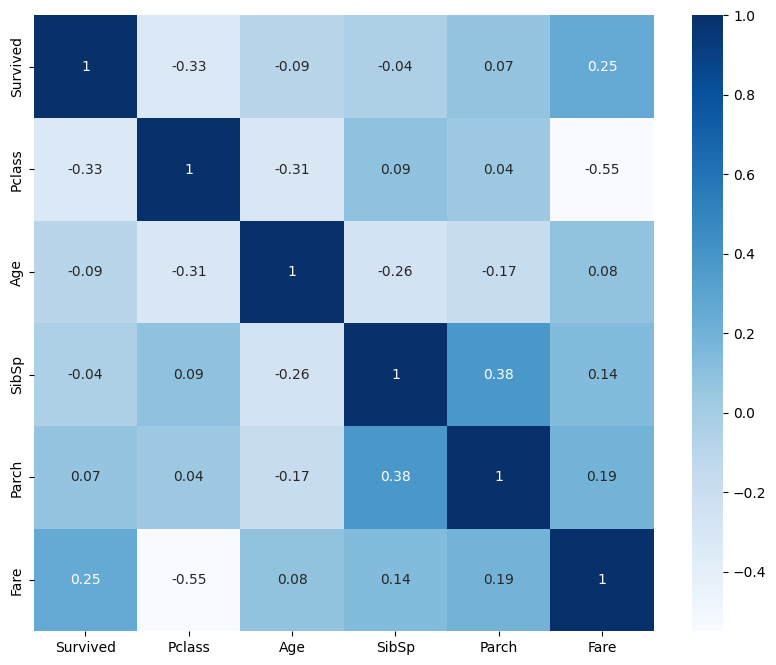

In [70]:
#Escriba su código aqui
import seaborn as sns

df_corr = df.corr().apply(lambda x: round(x,2))
plt.figure(figsize=(10,8))
sns.heatmap(df_corr,
            annot=True,
            cmap='Blues')
plt.show()

**P10.(1 pt)** Guarde la data procesada en un archivo, con el nombre DatosProcesados.xlsx

In [71]:
#Escribe tu código aqui
df.to_excel('DatosProcesados.xlsx')